<a href="https://colab.research.google.com/github/jhansi117/Purchase_behaviour_predicter/blob/main/SocialNetworkAds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
df.isnull().sum() #checking for null values

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
df.duplicated().sum() #checking for duplicated values

0

In [ ]:
df.drop(columns=['User ID'],inplace=True) #droping column user_id and inplace is added to make the changes permanent

In [ ]:
df.info()#the gender column is not numerical so we have to convert it into numerical
#One way of converting non-numerical values into numerical is by using get_dummies by pandas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [ ]:
# pd.get_dummies(df) #getting the dummy numerical values for columns with non-numerical values
df = pd.get_dummies(df,drop_first=True)
df

,Age,EstimatedSalary,Purchased,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1
...,...,...,...,...
395,46,41000,1,0
396,51,23000,1,1
397,50,20000,1,0
398,36,33000,0,1


In [ ]:
df.info()#checking if all the values are numerical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
 3   Gender_Male      400 non-null    uint8
dtypes: int64(3), uint8(1)
memory usage: 9.9 KB


In [ ]:
df['Purchased'].value_counts()#checking how many would purchase and how many would not

0    257
1    143
Name: Purchased, dtype: int64

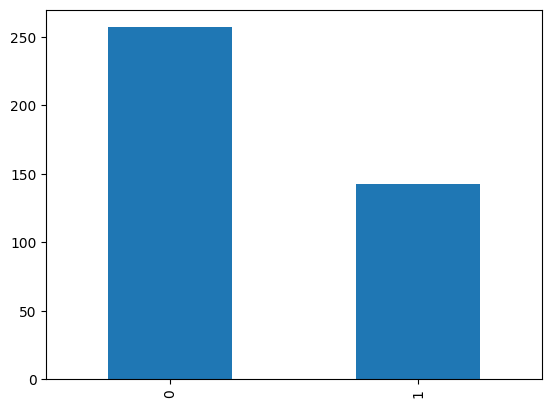

In [ ]:
df['Purchased'].value_counts().plot(kind='bar') #ploting how many would purchase and how many would not
plt.show()

In [ ]:
X = df.iloc[:,[0,1,3]].values  #setting the input and output values from the dataset
Y = df.iloc[:,2].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=2,test_size=0.2) #traning ans testing the data

In [ ]:
X.shape

(400, 3)

In [ ]:
X_train.shape

(320, 3)

In [ ]:
X_test.shape

(80, 3)

In [ ]:
0.2*400

80.0

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train

array([[    47,  47000,      0],
       [    36,  99000,      1],
       [    27,  57000,      0],
       [    48,  90000,      1],
       [    28,  89000,      1],
       [    42,  70000,      0],
       [    48, 141000,      1],
       [    41,  59000,      1],
       [    56,  60000,      1],
       [    36, 144000,      1],
       [    56, 104000,      0],
       [    24,  19000,      1],
       [    59,  88000,      0],
       [    51, 134000,      0],
       [    26,  80000,      1],
       [    34,  43000,      0],
       [    20,  86000,      1],
       [    32,  18000,      1],
       [    41,  45000,      1],
       [    38,  50000,      0],
       [    38,  71000,      1],
       [    37,  52000,      1],
       [    31,  18000,      1],
       [    38,  80000,      0],
       [    41,  72000,      0],
       [    33,  31000,      1],
       [    30,  17000,      1],
       [    35,  47000,      0],
       [    26,  86000,      1],
       [    37, 144000,      1],
       [  

In [ ]:
sc = StandardScaler()
X_train_scale = sc.fit_transform(X_train)
X_test_scale = sc.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier  #importing the classifier

In [ ]:
model = KNeighborsClassifier(n_neighbors=17,metric='euclidean')

In [ ]:
model.fit(X_train_scale,Y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=17)

In [ ]:
y_p = model.predict(X_test_scale)
model.predict([[19,19000,1]])

array([1])

In [ ]:
Y_test

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0])

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
accuracy_score(Y_test,y_p)

0.925

In [ ]:
pd.DataFrame(confusion_matrix(Y_test,y_p),index=['acutal_not_purchased','actual_purchased'],columns=['predicted_not_purchased','predicted_purchased'])

,predicted_not_purchased,predicted_purchased
acutal_not_purchased,46,2
actual_purchased,4,28


In [ ]:
print(classification_report(Y_test,y_p))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        48
           1       0.93      0.88      0.90        32

    accuracy                           0.93        80
   macro avg       0.93      0.92      0.92        80
weighted avg       0.93      0.93      0.92        80



In [ ]:
pred = model.predict([[   49, 36000,     0]])
pred[0]

1